<span style="color:#195879">

## 🚀😎 Minimum Viable Data Enthusiast
</span>

<span style="font-size:14.0pt">
<strong>Author:</strong></span> <span style="font-size:13.0pt">Manfredo E. Aceituno</span><br>
<span style="font-size:14.0pt"><strong>Date:</strong></span> <span style="font-size:13.0pt">November, 2024</span><br>
<span style="font-size:14.0pt"><strong>Programming language:</strong></span> <span style="font-size:13.0pt">Python</span>

<span></span>  
<span style="font-size:12.0pt">Nothing is perfect, so please [contact me](http://www.linkedin.com/in/manfredo-aceituno-perez) for any feedback or suggestions for improvement.</span> 

<span style="font-size:13.0pt">
<span style="color:#804999">

## **Schools of Antioquia at risk of flooding** 
</span>
</span>

#### **`Geopandas - Basic data analysis`**
>The analysis shows the geographical distribution of schools in Antioquia, Colombia, that are within a 350-meter buffer of water bodies (rivers).

>This provides a general overview of schools potentially at risk from river overflows. However, it's **important to note that** this analysis doesn't consider topographic elevation. Adding a Digital Elevation Model (DEM) could help enhance the results by excluding schools on higher ground that are less likely to be flooded. Furthermore, by analyzing individual rivers, we could identify those that pose the greatest flood risk. This initial analysis demonstrates the capabilities of Geopandas for spatial analysis.

<a id="table_content"></a>
## Table of Contents

1. [Dataframes preparation Overview](#Intro)
2. [Map - Schools and rivers visualization](#map_graph)
3. [Insights](#conclusion)

# 1. Dataframes preparation
<a id="Intro"></a>

[Return to: Table of contents](#table_content)

In [1]:
# Libraries
import geopandas as gpd

In [2]:
# Reading the spatial datasets
# The first layer includes Colombia's departments
departments = gpd.read_file(r"C:\Users\...Districts.zip")
departments.head()

,DeCodigo,DeNombre,DeArea,DeNorma,Shape_Leng,Shape_Area,geometry
0,00,Area en Litigio Cauca - Huila,342.099087,Límite por Acuerdo Gobernadores Informe 1982,1.093000e+05,3.420991e+08,"POLYGON ((4628086.407 1824018.057, 4628427.450..."
1,05,Antioquia,62786.020507,Constitución Política de Colombia 1886,2.356259e+06,6.278602e+10,"POLYGON ((4624482.375 2526319.238, 4624578.119..."
2,08,Atlántico,3313.384461,Ley No. 21 de 1910,2.792774e+05,3.313384e+09,"POLYGON ((4798072.649 2784977.412, 4798080.944..."
3,13,Bolívar,26662.776537,Constitución Política de Colombia 1886,1.651842e+06,2.666278e+10,"POLYGON ((4753469.562 2752302.933, 4753478.480..."
4,15,Boyacá,23078.339852,Constitución Política de Colombia 1886,1.759339e+06,2.307834e+10,"POLYGON ((5091224.442 2337434.687, 5091324.646..."


<Axes: >

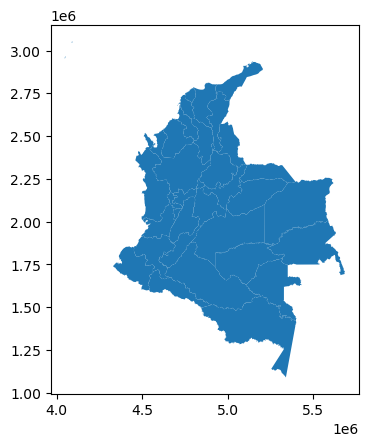

In [3]:
# Plotting first layer (departments) to validate that the data includes the whole map of Colombia
departments.plot()

In [4]:
# The second layer includes Colombia's rivers
rivers = gpd.read_file(r"C:\Users...DrenajeDoble.zip")
rivers.head()

,NOMBRE_GEO,PROYECTO,SYMBOL,FECHA,RULEID,PK_CUE,GLOBALID,SHAPE_Leng,SHAPE_Area,geometry
0,Río Orotoy,None,3,None,1,621017.0,{054A9004-ABDD-42CF-A53C-5F324A8FA73D},145366.145213,4.979716e+06,"POLYGON ((4909479.529 1993001.865, 4909516.685..."
1,Río Pajure,None,3,None,1,621018.0,{66053188-AB90-41B8-901F-DF8E26007F54},55008.994885,2.958652e+06,"POLYGON ((4987858.787 1987249.590, 4987859.694..."
2,Río Acacías,None,3,None,1,621019.0,{C4B248CE-D5E1-4621-9431-B7236AC5B4F2},172922.843927,6.804869e+06,"POLYGON ((4917475.028 1997912.740, 4917509.030..."
3,Río Metica,None,3,None,1,621020.0,{CAF4C7EF-D492-4857-8F6F-BAA4BD99492A},100067.284405,7.498651e+06,"POLYGON ((4991031.029 1990231.191, 4990993.076..."
4,Río Humadea,None,3,None,1,621021.0,{8E6250C2-5929-47E1-9403-633EDBB599F2},165279.271535,9.678161e+06,"POLYGON ((4916329.630 1979482.012, 4916389.113..."


<Axes: >

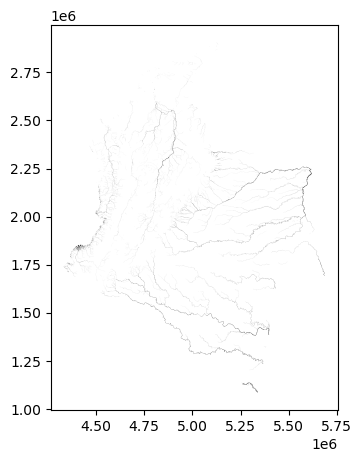

In [5]:
# Plotting second layer (rivers) to validate that the data works
rivers.plot(figsize = (5,5), color="black")

In [6]:
# The third layer includes Colombia's schools
schools = gpd.read_file(r"C:\Users\...schools.zip")
schools.head(3)

,OBJECTID,Codigo,Nombre,Direccion,Telefono,DeCodigo,DeNombre,MDANMNombr,Zona,Sector,Email,geometry
0,1,376001041602,CENTRO DE ESTUDIOS PARA LOS SISTEMAS DE INFORM...,KR 46 NO 14-46,3357648-3357689,76,VALLE DEL CAUCA,CALI,Urbano,NO OFICIAL,None,POINT (4607955.181 1935702.924)
1,2,376001038818,CASA MATERNAL JARDÍN INFANTIL TIA MARTHA,AV 2A #50-43,6643869,76,VALLE DEL CAUCA,CALI,Urbano,NO OFICIAL,None,POINT (4609995.169 1943348.264)
2,3,376001041706,JARDÍN ALEGRIAS INFANTILES,AV 2 I N NO 47B N 31,6648502,76,VALLE DEL CAUCA,CALI,Urbano,NO OFICIAL,alegrias_infantiles@yahoo.com,POINT (4609523.797 1943375.270)


In [7]:
# Let's analyze the polygon data of the Department Antioquia with a query
antioquia = departments.query("DeNombre == 'Antioquia'")
antioquia

,DeCodigo,DeNombre,DeArea,DeNorma,Shape_Leng,Shape_Area,geometry
1,05,Antioquia,62786.020507,Constitución Política de Colombia 1886,2.356259e+06,6.278602e+10,"POLYGON ((4624482.375 2526319.238, 4624578.119..."


<Axes: >

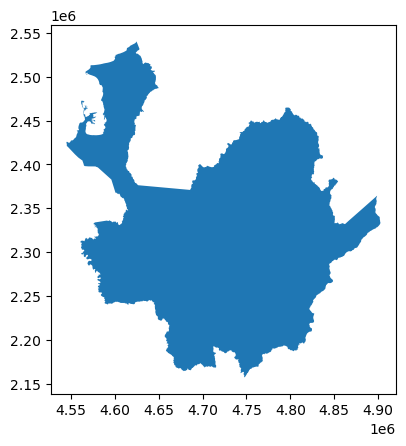

In [8]:
# Here I visualize only the department Antioquia
antioquia.plot()

<Axes: >

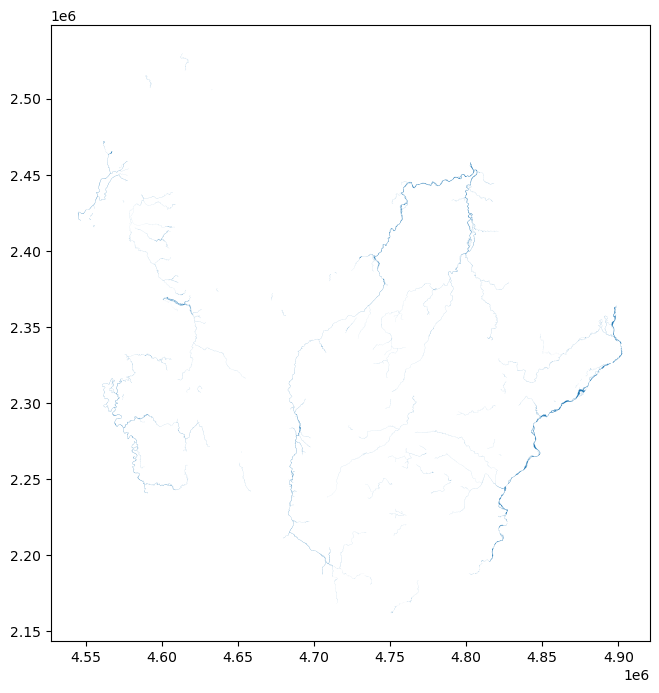

In [9]:
# Let's apply the Rivers layer with the method "overlay" on the "departments" map layer 1.
rivers_antioquia = gpd.overlay(antioquia, rivers, how = "intersection")
rivers_antioquia.plot(figsize = (12,8))

<Axes: >

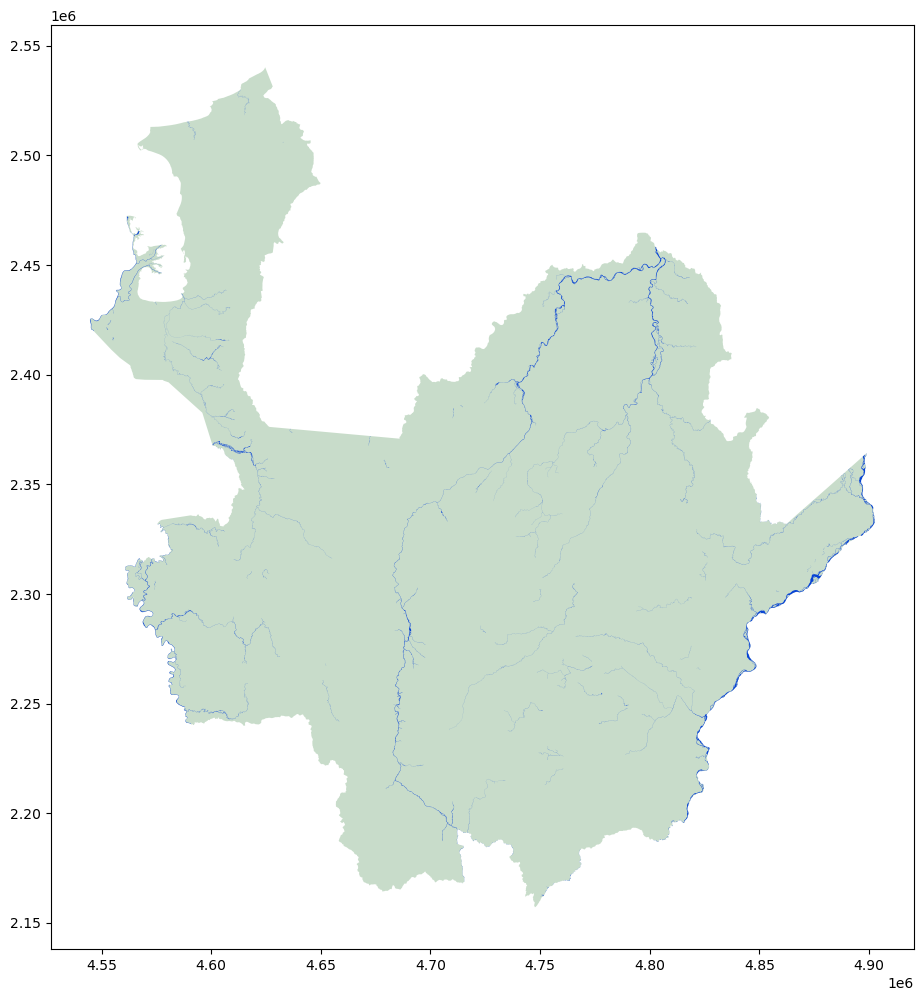

In [10]:
# Here both layers will be combined in one: Antioquia and Rivers, to see the rivers of that specific department
axis = antioquia.plot(color = "#a4c6a7", figsize = (12,12), alpha = 0.6) # Color has html code
rivers_antioquia.plot(ax=axis, color = "#0743d5", figsize = (12,12), ) # Color has html code

In [11]:
# # Let's analyze the data locations of the Schools in Antioquia with a query
antioquia_schools = schools.query("DeCodigo == 5")
antioquia_schools.head(3)

,OBJECTID,Codigo,Nombre,Direccion,Telefono,DeCodigo,DeNombre,MDANMNombr,Zona,Sector,Email,geometry
33,43,405001016946,COLEGIO COOPERATIVO SAN ANTONIO DE PRADO,CL 38 SUR 70 181,2865300,5,ANTIOQUIA,MEDELLIN,Rural,NO OFICIAL,ccprado@epm.net.co,POINT (4707675.538 2241787.428)
34,44,405001018213,COLEGIO CEDEPRO (CENTRO DE EDUCATIVO PRODUCTIVA),KR 112 # 13-111 LA PERLA,2922419,5,ANTIOQUIA,MEDELLIN,Rural,NO OFICIAL,None,POINT (4717163.854 2249568.111)
35,46,405001021265,SECCION ESCUELA VENTANITAS,CR 3 A ESTE CON CLL 4 BB,2867759,5,ANTIOQUIA,MEDELLIN,Rural,OFICIAL,IVENTANI@EDUCAME.GOV.CO,POINT (4707445.245 2241114.582)


<Axes: >

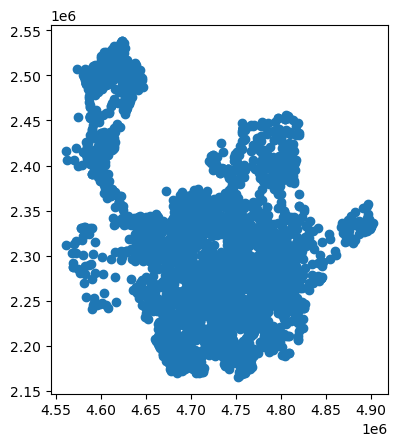

In [12]:
# Visualizing all schools location
antioquia_schools.plot()

# 2. Map: Schools and rivers visualization
<a id="map_graph"> </a>

[Return to: Table of contents](#table_content)

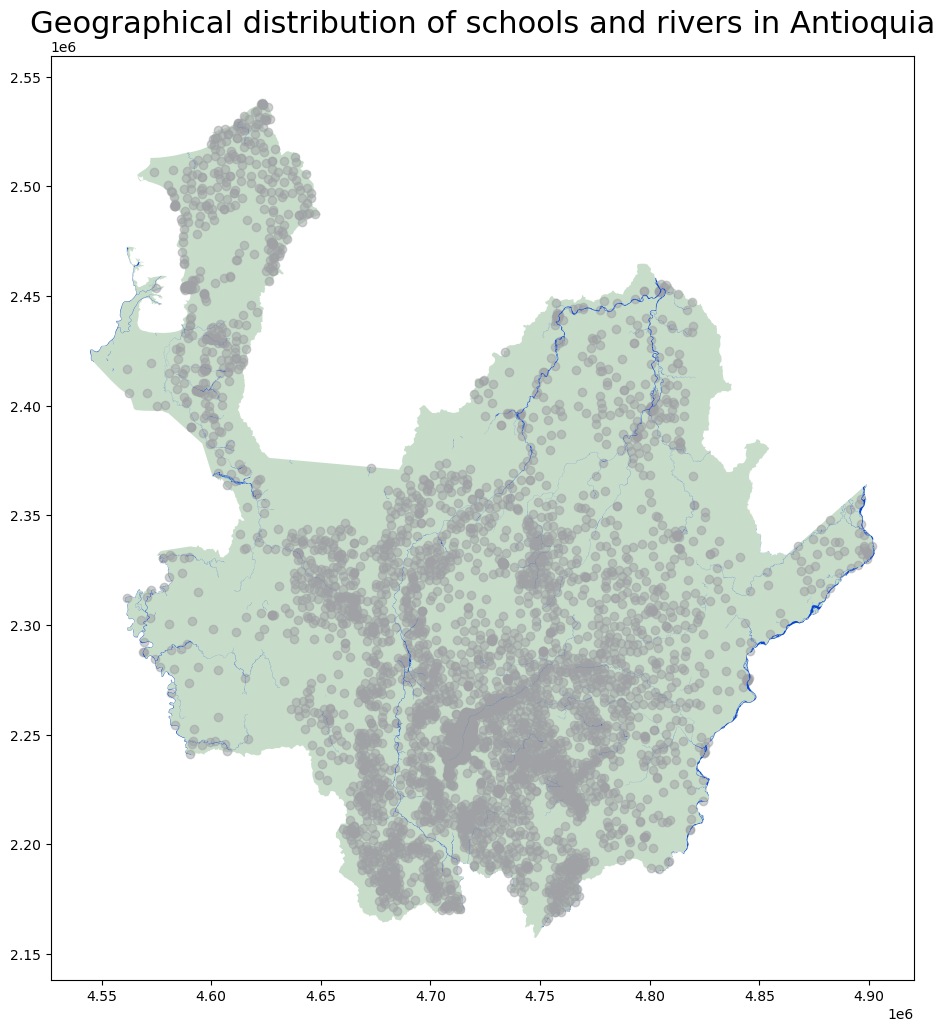

In [13]:
# Here three layers will be combined in one: Antioquia, schools and Rivers, to see how near/far the Schools are from rivers
# Note that: 'ax' parameter allows you to create a multi-layered plot where different datasets are visualized on the same axes.

axis = antioquia.plot(color = "#a4c6a7", figsize = (12,12), alpha = 0.6) # Color has html code
antioquia_schools.plot(ax=axis, color = "#9fa1a4", alpha = 0.5) # Color has html code
rivers_antioquia.plot(ax =axis, color = "#0743d5")

import matplotlib.pyplot as plt
plt.title("Geographical distribution of schools and rivers in Antioquia", fontsize =22)
plt.show()

>**Danger zones nearby rivers:**
To analyze the influence areas of potential river overflows around schools, we must first check the Coordinate Reference System (CRS) 
of the dataframe containing this information (rivers_antioquia). If the CRS is in "Cartesian" we can proceed with a buffer analysis for example, and it is **not** needed to set a **reprojecting** for making further operations.


In [14]:
# Displaying the Coordinate Reference System
rivers_antioquia.crs

<Projected CRS: PROJCS["MAGNA-SIRGAS_Origen-Nacional",GEOGCS["MAGN ...>
Name: MAGNA-SIRGAS_Origen-Nacional
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Assumptions for the river overflows analysis:
>Let's assume that according to historical data, the average influence areas of potential river overflows is 350 meters.

In [15]:
# A new column is created to store the buffer for an assumption of an influence sorrounding area of 350 m from the river
rivers_antioquia["overflow_350"] = rivers_antioquia.buffer(350)

<Axes: >

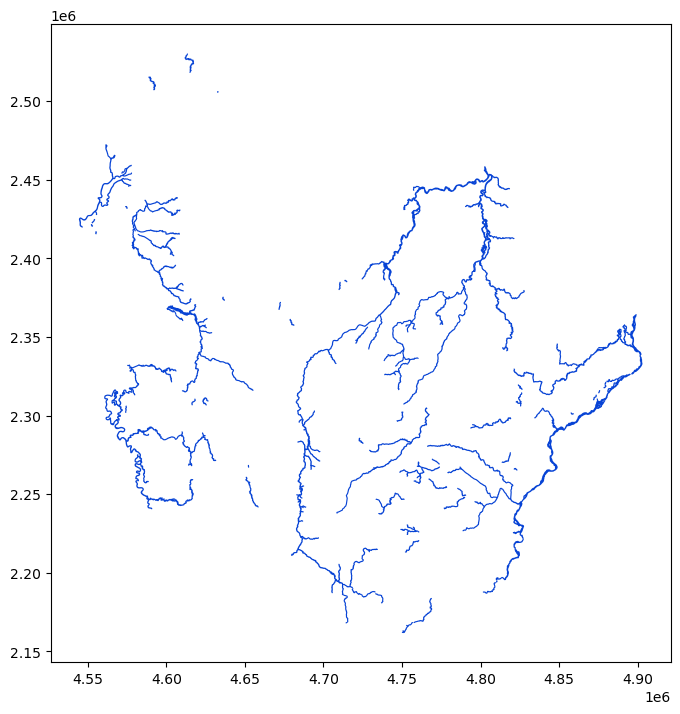

In [16]:
rivers_antioquia["overflow_350"].plot(figsize = (8,12),color = "#0743d5")

<Axes: >

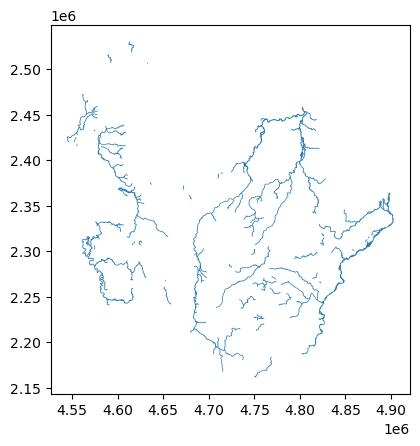

In [17]:
# Here the column "overflow_350" is the new geometry
rivers_antioquia = rivers_antioquia.set_geometry("overflow_350")
rivers_antioquia.plot()

In [18]:
# Let's analyze which are the schools locations affected in Antioquia
schools_affected = gpd.overlay(antioquia_schools, rivers_antioquia, how = "intersection") # the second parameter is taking the geometry of the buffer "overflow_350"
schools_affected.head()

,OBJECTID,Codigo,Nombre,Direccion,Telefono,DeCodigo_1,DeNombre_1,MDANMNombr,Zona,Sector,...,NOMBRE_GEO,PROYECTO,SYMBOL,FECHA,RULEID,PK_CUE,GLOBALID,SHAPE_Leng,SHAPE_Area,geometry
0,71,405649001146,CENTRO EDUCATIVO RURAL EL CHARCON,VDA EL CHARCON,None,5,ANTIOQUIA,SAN CARLOS,Rural,NO OFICIAL,...,Río Guatapé,None,3,None,1,623737.0,{A18FCB29-3ABB-4AE7-96E7-8DF8956E6B12},1.781203e+04,5.957683e+05,POINT (4788614.774 2249734.390)
1,83,405045000338,INSTITUTO UNIBAN,KM 1 ZUNGO CARRETERA,8296600,5,ANTIOQUIA,APARTADO,Rural,NO OFICIAL,...,Río Apartadó,None,3,None,1,622139.0,{0A2DD0C9-B084-4AD7-85A5-7529F5E8B995},7.574457e+04,1.413684e+06,POINT (4600098.051 2430377.497)
2,130,405308000800,ESCUELA RURAL LA MATICA PARTE ALTA,VDA LA MATICA PARTE ALTA,4569585,5,ANTIOQUIA,GIRARDOTA,Rural,OFICIAL,...,Río Medellín,None,3,None,1,621809.0,{6CE57AEB-51DD-4461-B919-DD2227990A2A},1.690674e+05,3.188019e+06,POINT (4729638.949 2264633.404)
3,143,405390000545,INSTITUTO ARQUIDIOCESANO URBANA Y RURAL - IAUR,VDA LA BOCANA,841 27 69,5,ANTIOQUIA,LA PINTADA,Rural,NO OFICIAL,...,Río Cauca,None,3,None,1,621711.0,{7C08054B-AEEE-4BAE-A29F-88BAA5DAD750},2.641890e+06,1.979386e+08,POINT (4711927.309 2188155.716)
4,155,405495000087,CENTRO EDUCATIVO RURAL PUERTO GAITAN,VDA PTO GAITAN,None,5,ANTIOQUIA,NECHI,Rural,OFICIAL,...,Río Nechí,None,3,None,1,621712.0,{423E1474-EDC1-4DA1-AF1B-36DDF9213A7D},5.415495e+05,3.176484e+07,POINT (4800604.722 2419059.725)


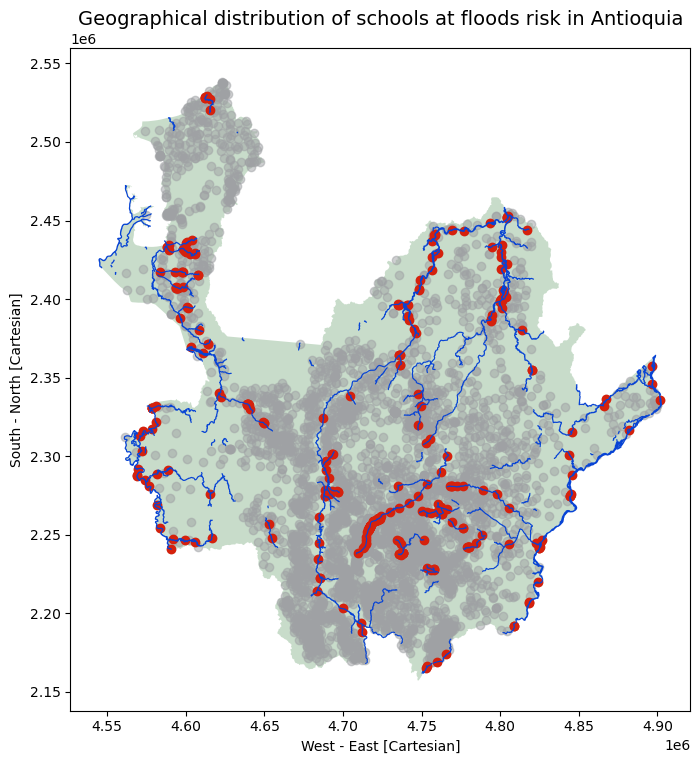

In [19]:
# Here it can be visualized the schools in color red, which are in risk of floods within a perimeter of 350 meters from the rivers

axis = antioquia.plot(color = "#a4c6a7", figsize = (8,12), alpha = 0.6) # Green map layer: Main region 
antioquia_schools.plot(ax = axis, color = "#9fa1a4", alpha = 0.5) # Gray dots layer: displaying all schools
schools_affected.plot(ax = axis, color = "#d6210c") # Red dots layer: displaying all schools in risk of floods
rivers_antioquia.plot(ax = axis, color = "#0743d5") # Blue lines layer: displaying the rivers of Antioquia

plt.title("Geographical distribution of schools at floods risk in Antioquia", fontsize =14)
plt.xlabel("West - East [Cartesian]")
plt.ylabel("South - North [Cartesian]")
plt.show()

# 3. Insights
<a id="conclusion"> <a/>

[Return to: Table of contents](#table_content)

In [20]:
# How many schools are in Antioquia?
print(f"The region of Antioquia has {antioquia_schools["Nombre"].shape[0]} schools.")

# How many schools are in potential risk?
print(f"And {schools_affected["Nombre"].shape[0]} schools are in potential risk of floods considering an average influence distance of 350 meters from the rivers.")

# What % of schools of Antioquia are in potential risk?
print(round(350/5091*100,1),"% of the schools in Antioquia are in risk.")

The region of Antioquia has 5091 schools.
And 330 schools are in potential risk of floods considering an average influence distance of 350 meters from the rivers.
6.9 % of the schools in Antioquia are in risk.
